# Decision Tree Classification in Python

# Importing Required Libraries

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Loading Data

In [27]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'Outcome']
# load dataset
pima = pd.read_csv("diabetes.csv")

In [28]:
pima.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Feature Selection

In [31]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

# Splitting Data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Building Decision Tree Model and evaluating it

In [33]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer a


y_pred = clf.predict(X_test)


In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.6926406926406926)


# Visualizing Decision Trees

In [44]:
!pip install pydotplus

    100% |████████████████████████████████| 286kB 8.1MB/s eta 0:00:01
  Running setup.py bdist_wheel for pydotplus ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [45]:
!pip install graphviz

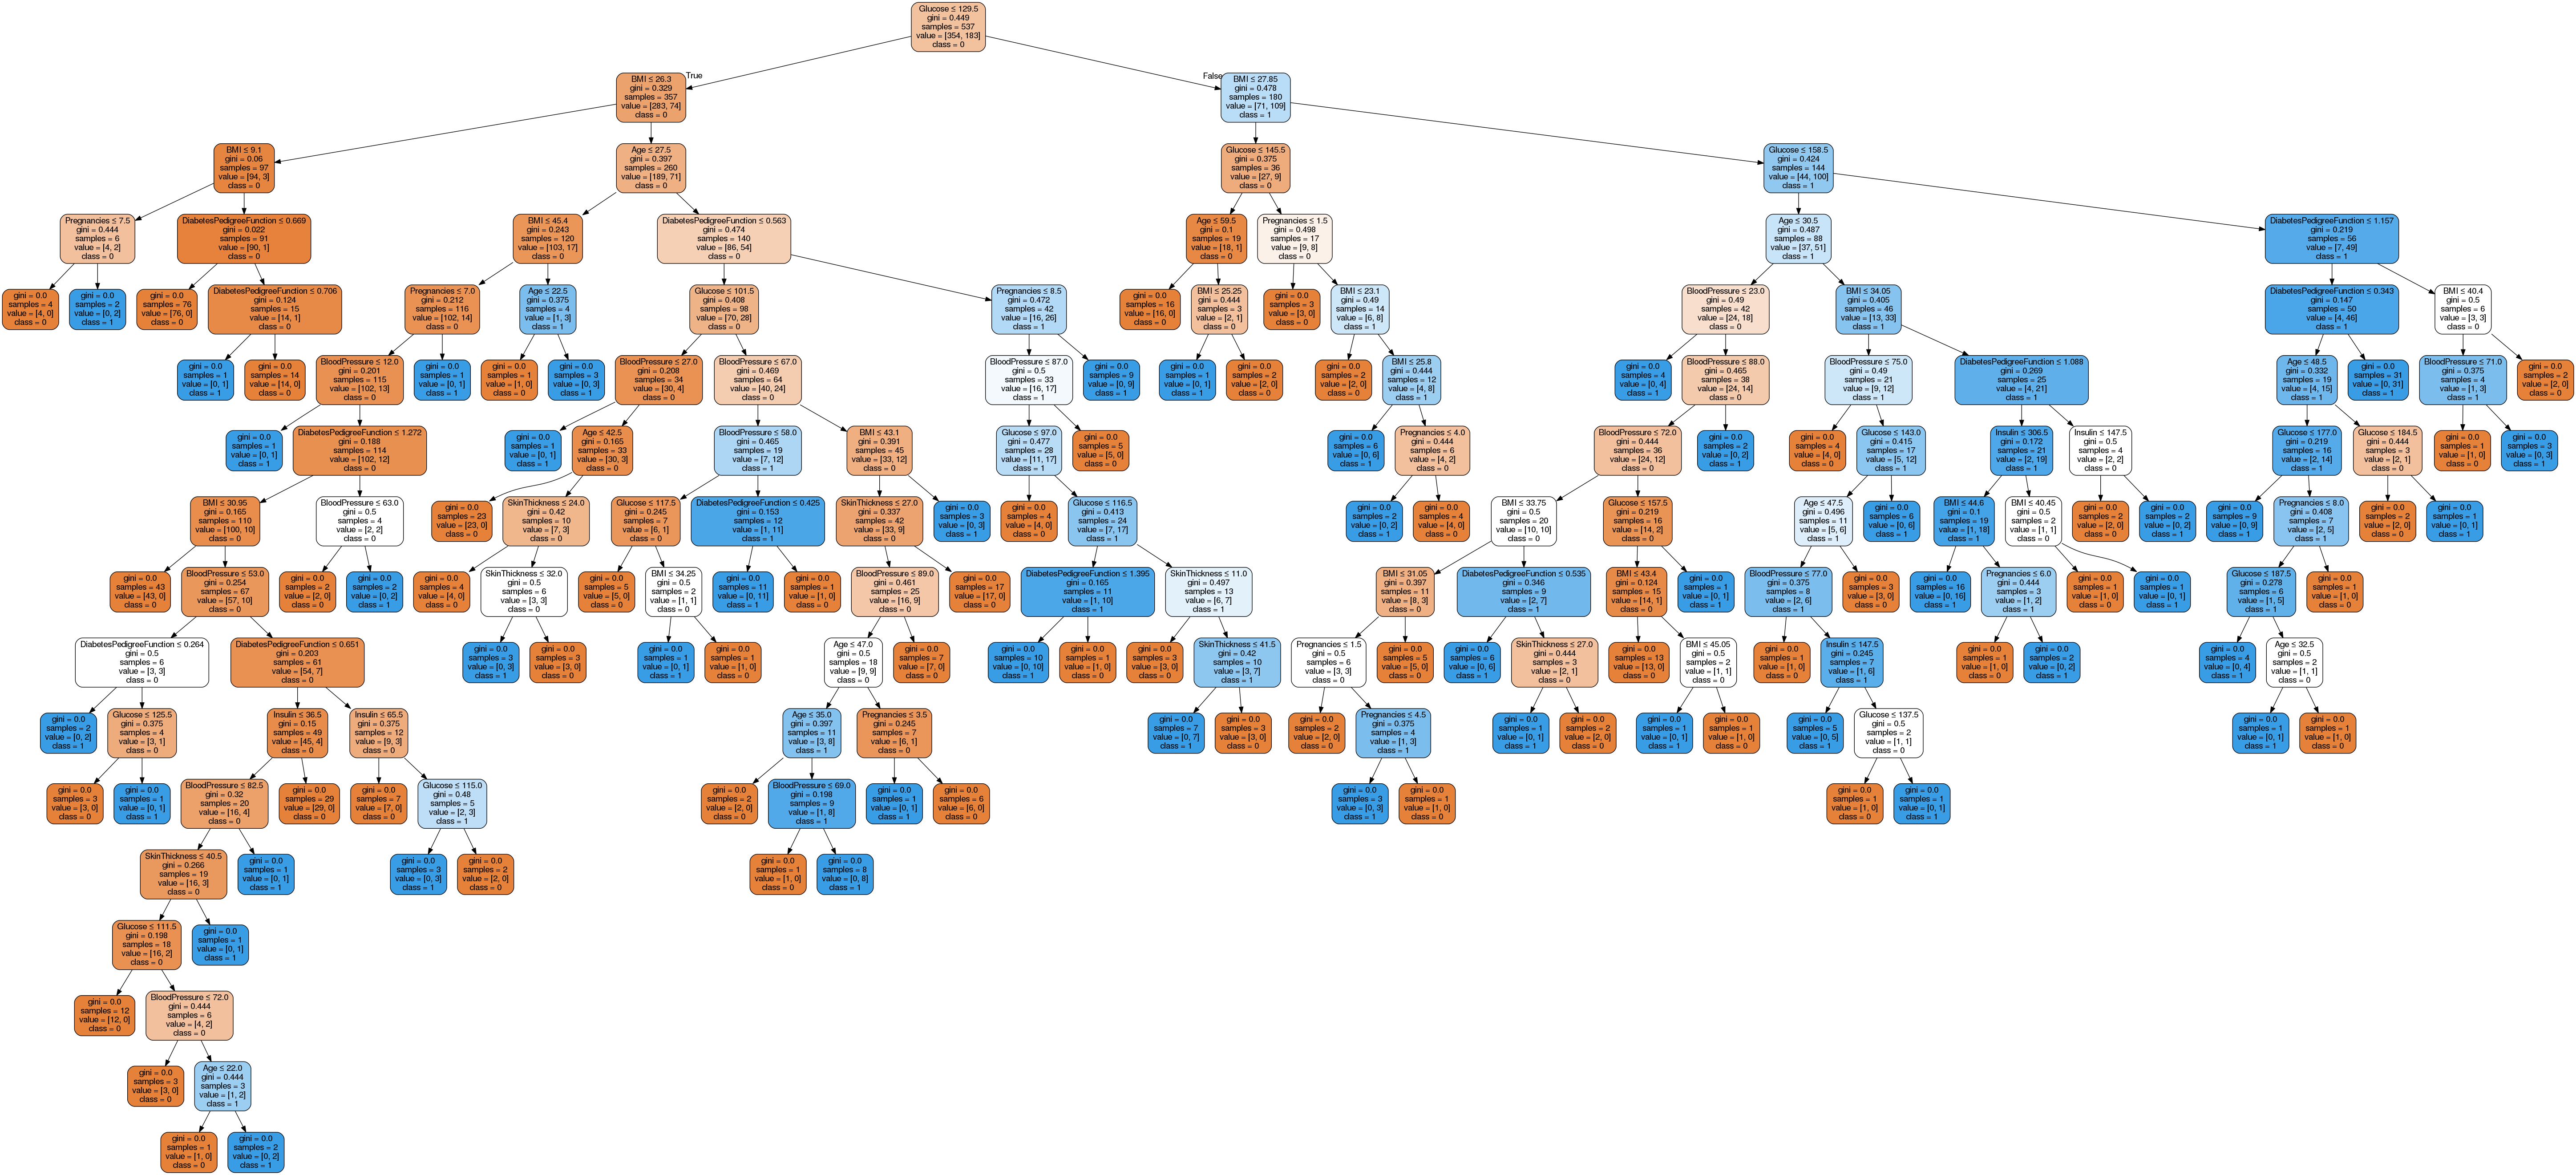

In [46]:

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# confusion matrix

In [47]:
import sklearn.metrics as metrics

In [48]:
metrics.confusion_matrix(y_test, y_pred)

array([[119,  27],
       [ 44,  41]])

# f1 score

In [49]:
f1=metrics.f1_score(y_test, y_pred)
print(f1)

0.5359477124183007


# Precision and Recall Score

In [50]:
precision=metrics.precision_score(y_test, y_pred)
print(precision)

0.6029411764705882


In [51]:
recall=metrics.recall_score(y_test, y_pred)
print(recall)

0.4823529411764706


In [52]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.7705627705627706)


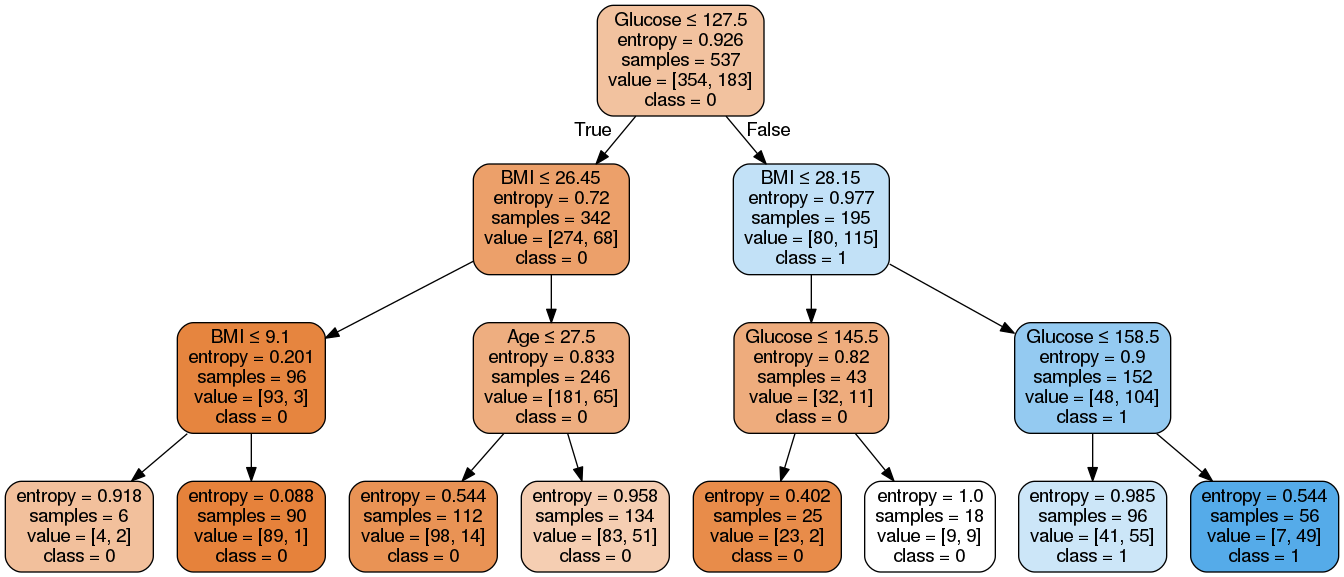

In [53]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logreg = LogisticRegression()

In [57]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
ypred=logreg.predict(X_test)

In [59]:
metrics.mean_squared_error(y_test,ypred)

0.22510822510822512